In [ ]:
# Installation
!pip install seaborn matplotlib

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
CSV_file_path= '/content/...../Book1.csv'
data = pd.read_csv(CSV_file_path)

In [ ]:
smiles =data['SMILES']
toxicity =data['Experimental logEC50']

In [ ]:
# Check the number of unique molecules
# Define toxicity categories (you can adjust the bins as needed)
toxicity_bins = [0, 1, 2, 3, 4, 5]
toxicity_labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
data['Toxicity_Category'] = pd.cut(toxicity, bins=toxicity_bins, labels=toxicity_labels)

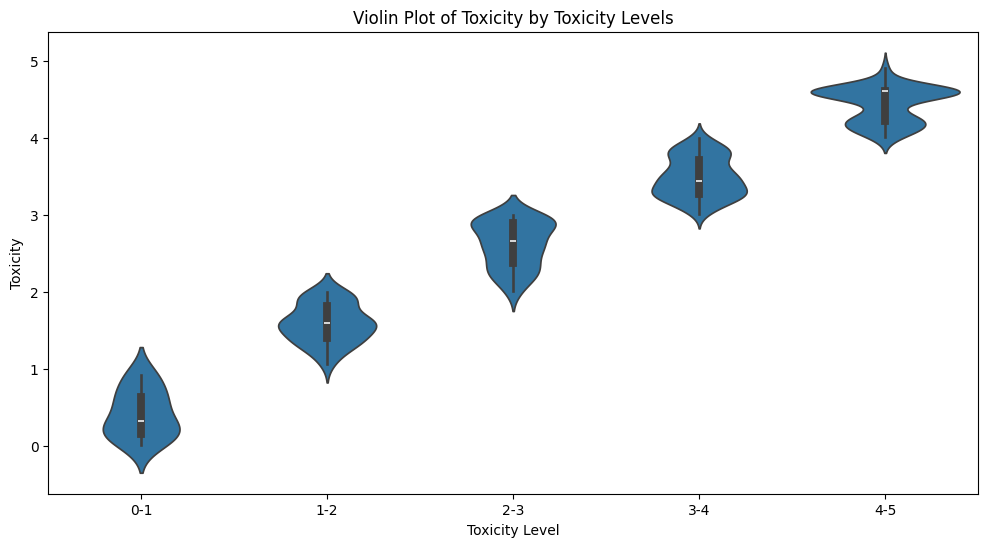

In [ ]:
# Create the Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Toxicity_Category', y= toxicity, data=data)
plt.title('Violin Plot of Toxicity by Toxicity Levels')
plt.xlabel('Toxicity Level')
plt.ylabel('Toxicity')
plt.show()

The violin plot provided displays the distribution of toxicity values categorized into different toxicity levels.

1. Toxicity Levels (x-axis):

The x-axis represents different bins or categories of toxicity levels, which have been divided into ranges: 0-1, 1-2, 2-3, 3-4, and 4-5.

2. Toxicity Values (y-axis):

The y-axis represents the actual toxicity values corresponding to each category.

3. Each "violin" shape represents the distribution of toxicity values within a specific toxicity level. The width of the violin at different y-values shows the density of the data points at those values.

4. Box Plot Components Inside Each Violin:

Inside each violin plot, there is a black box plot that shows the summary statistics:
The white dot represents the median of the toxicity values.
The thick black bar represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile).
The thin black lines (whiskers) extend to 1.5 times the IQR, indicating the range of most of the data points.
Any points outside of the whiskers are considered outliers.



 Interpretation:

 1. Toxicity Level 0-1:

The distribution is fairly narrow, indicating that most of the toxicity values are close to each other.
The median is around 0.5, with the IQR ranging roughly from 0.25 to 0.75.
There is a relatively low density of data points, suggesting fewer molecules fall within this toxicity range.

2. Toxicity Level 1-2:

The distribution is slightly wider than the 0-1 range, indicating more variability in toxicity values.
The median is around 1.5, with the IQR ranging from about 1.2 to 1.8.
There is a modest density of data points, indicating a moderate number of molecules in this range.

3. Toxicity Level 2-3:

The distribution has a wider spread, indicating even more variability in toxicity values.
The median is around 2.5, with the IQR ranging from about 2.2 to 2.8.
The density is higher compared to the previous levels, suggesting a larger number of molecules fall within this range.

4. Toxicity Level 3-4:

The distribution is similar in spread to the 2-3 range but appears slightly more peaked.
The median is around 3.5, with the IQR ranging from about 3.2 to 3.8.
There is a high density of data points, indicating that a substantial number of molecules have toxicity values in this range.

5. Toxicity Level 4-5:

The distribution is the widest, indicating the most variability in toxicity values.
The median is around 4.5, with the IQR ranging from about 4.2 to 4.8.
This level shows a high density of data points, suggesting that many molecules have higher toxicity values within this range.

Summary:

The violin plot shows that as the toxicity level increases, the distribution of toxicity values becomes wider, indicating greater variability.
The number of molecules (density) also increases with higher toxicity levels, particularly in the 3-4 and 4-5 ranges, suggesting that a significant portion of the dataset has higher toxicity values.
The medians of the toxicity values align well with the middle of their respective ranges, indicating a relatively symmetric distribution around the central values.

This detailed interpretation provides insight into how the toxicity values are distributed across different levels, helping to identify patterns and trends in the data.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Split the data into Training, Test, and Validation Sets
train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42)  # 60% Training
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)  # 20% Test, 20% Validation

In [ ]:
# Add a column to indicate the set type
train_data["Set"] = "Training"
test_data["Set"] = "Test"
val_data["Set"] = "Validation"

# Step 2: Combine datasets into a single DataFrame
combined_data = pd.concat([train_data, test_data, val_data])

<ipython-input-14-bdbc2478a3f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Set", y="Experimental logEC50", data=combined_data, palette="muted")


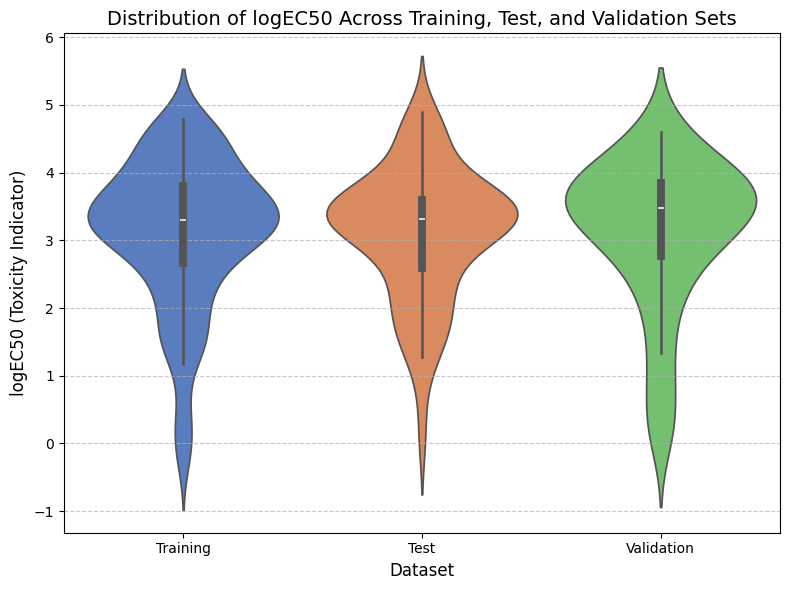

In [ ]:
# Step 3: Create the Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Set", y="Experimental logEC50", data=combined_data, palette="muted")
plt.title("Distribution of logEC50 Across Training, Test, and Validation Sets", fontsize=14)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("logEC50 (Toxicity Indicator)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()